------------------------------------------
Start processing file : instances/CL_07_25_02.TXT
nClass :  07  instanceID :  02
nElements :  25
capacity1 :  150
capacity2 :  150
items :  {1: [27, 31], 2: [88, 79], 3: [79, 71], 4: [43, 36], 5: [53, 56], 6: [45, 47], 7: [65, 58], 8: [23, 30], 9: [97, 99], 10: [91, 95], 11: [77, 78], 12: [73, 67], 13: [42, 48], 14: [56, 63], 15: [53, 50], 16: [77, 76], 17: [40, 44], 18: [38, 29], 19: [38, 41], 20: [28, 20], 21: [28, 24], 22: [82, 81], 23: [21, 13], 24: [23, 15], 25: [52, 58]}
Finished processing file : instances/CL_07_25_02.TXT
------------------------------------------
nIterationsGA:  1001

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Best solution has  10  bins
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Solution has  10  bins
Bins :  {1: {25, 3}, 2: {1, 2, 20}, 3: {9, 4}, 4: {8, 18, 19, 21, 24}, 5: {16, 12}, 6: {22, 15}, 7: {11, 6, 23}, 8: {10, 13}, 9: {5, 7}, 10: {17, 14}}
binsCapacities1 :  {1: 131, 2: 143, 3: 140, 4: 150, 5: 150, 6: 135, 7: 143, 8: 133, 9

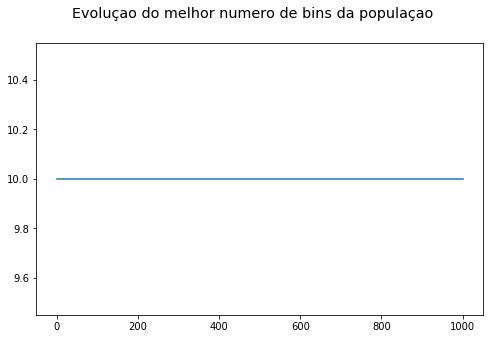

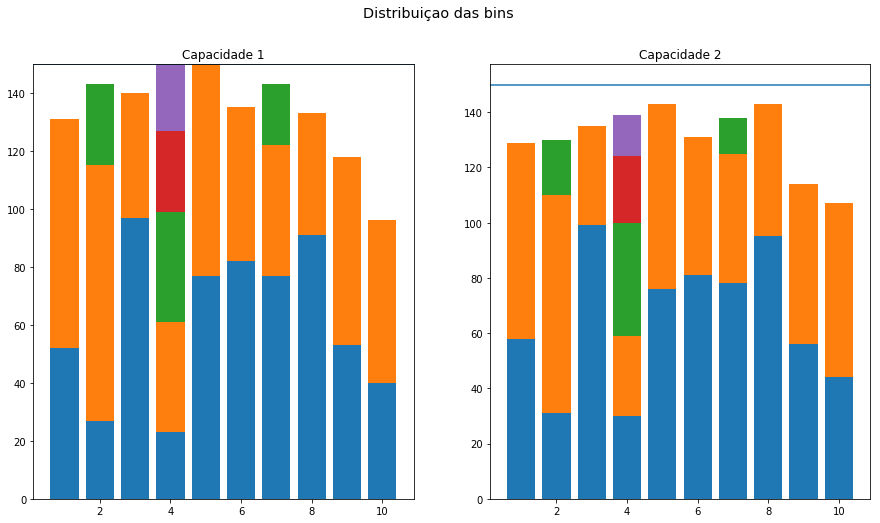

In [9]:
from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import sys, getopt
import math
import random
import timeit
import os
import copy

######## FUNCTIONS

#### DEBUG
def printPopulation(population):
    print("----------------- POPULATION : -----------------")
    count = 0
    for solution in population:
        print("Solution ",count, " has ",solution[3], " bins")
        print("Bins : ", solution[0])
        print("binsCapacities1 : ", solution[1])
        print("binsCapacities2 : ", solution[2])
        print("")
        count += 1
    print("------------------------------------------------")
    
def printElement(solution):
    print("Solution has ",solution[3], " bins")
    print("Bins : ", solution[0])
    print("binsCapacities1 : ", solution[1])
    print("binsCapacities2 : ", solution[2])
    
#### SEED Set up
def set_seed(seed_value):
    '''Setting seed'''
    # Set a seed value: 
    seed_value = seed_value  
    # 1. Set PYTHONHASHSEED environment variable at a fixed value: 
    os.environ['PYTHONHASHSEED']=str(seed_value) 
    # 2. Set python built-in pseudo-random generator at a fixed value:
    random.seed(seed_value) 
    # 3. Set numpy pseudo-random generator at a fixed value:
    np.random.seed(seed_value)
    
### Functions to process the files and print in log
def processFile(filename):
    '''No final, vamos ter:
    nElements => numero de bins
    capacity1 => capacidade 1 das bins
    capacity2 => capacidade 2 das bins
    items => dicionario com:
            chaves = numero do item
            valores = lista das capacidades usadas pelo item
            
    exemplo : processFile('instances/CL_01_25_01.TXT') dá:
    nElements = 25
    capacity1 = 1000 = capacity2
    items = {1: [165, 125], 2: [315, 355], 3: [117, 321],..., 24: [125, 111], 25: [136, 220]}
    '''   
    print('------------------------------------------')
    print('Start processing file :', filename)
    instance = filename[10:-3]
    delimiter = ' '
    with open(filename,'r') as file:
        csv_reader = csv.reader(file, delimiter = delimiter)
        nElements, capacity1, capacity2 = 0,0,0 # general data about number of items and capacities of bins
        nClass = instance[3:5]
        items = {} # dictionary to store the items data
        lineCount = 0  # for parsing
        for row in csv_reader:
            if lineCount == 0 : # nElements
                for i in range(0,len(row)):
                    if row[i] != '': # number of blank spaces is not fixed
                        nElements = int(row[i])
                        if nElements < 100:
                            instanceID = instance[9:11]
                        else:
                            instanceID = instance[10:12]
            elif lineCount == 1: # capacity1 and capacity2
                capacitiesCount = 0 # for parsing
                for i in range(0,len(row)):
                    if row[i] != '': 
                        if capacitiesCount == 0:
                            capacity1 = int(row[i])
                            capacitiesCount += 1
                        else:
                            capacity2 = int(row[i])
            else: # take data from each item
                itemCapacity1 = 0 # capacity 1 of item
                itemCapacity2 = 0 # capacity 2 of item
                itemsCapacitiesCount = 0 # for parsing
                for i in range(0,len(row)):
                    if row[i] != '': 
                        if itemsCapacitiesCount == 0:
                            itemNumber = int(row[i])
                            itemsCapacitiesCount += 1
                        elif itemsCapacitiesCount == 1:
                            itemCapacity1 = int(row[i])
                            itemsCapacitiesCount += 1
                        else:
                            itemCapacity2 = int(row[i])
                items[itemNumber] = [itemCapacity1,itemCapacity2]        
            lineCount += 1
    print('nClass : ',nClass, ' instanceID : ', instanceID)
    print('nElements : ',nElements)
    print('capacity1 : ',capacity1)
    print('capacity2 : ',capacity2)
    print('items : ',items)
    print('Finished processing file :', filename)
    print('------------------------------------------')
    return nElements, nClass, instanceID, capacity1, capacity2, items

### Initial Solution
def getRandomInitialPopulation(nPopulation):
    '''Creates nPopulation elements for the initial population'''
    nPopCreated = 0
    initialPopulation = []
    
    while (nPopCreated < nPopulation):
        inserted = False
        while(inserted == False):
            # Estruturas de dados para a soluçao
            nBins = 1
            currentBin = set()
            currentBinCapacity1 = 0
            currentBinCapacity2 = 0
            bins, binsCapacities1, binsCapacities2 = {}, {}, {}
            # Inserimos elementos
            novosItems = list(range(1,nElements +1))
            random.shuffle(novosItems)
            for i in novosItems:
                itemNumber, itemCapacities = i, items[i]
                itemCap1 = itemCapacities[0]
                itemCap2 = itemCapacities[1]    
                if (itemCap1 + currentBinCapacity1 > capacity1 or itemCap2 + currentBinCapacity2 > capacity2):
                    # Inserimos nas estruturas finais
                    bins[nBins] = currentBin
                    binsCapacities1[nBins] = currentBinCapacity1
                    binsCapacities2[nBins] = currentBinCapacity2
                    # Adicionamos um bin
                    nBins += 1
                    # Zeramos os contadores
                    currentBin = set()
                    currentBinCapacity1 = 0
                    currentBinCapacity2 = 0
                # Podemos inserir o elemento na bin
                currentBin.add(itemNumber)
                currentBinCapacity1 += itemCap1
                currentBinCapacity2 += itemCap2 

            # Inserimos a ultima bin nas estruturas finais
            bins[nBins] = currentBin
            binsCapacities1[nBins] = currentBinCapacity1
            binsCapacities2[nBins] = currentBinCapacity2
            
            # Checamos se a solucao nao existe já
            solutionLength = len(bins)
            canInsert = True
            for solution in initialPopulation:
                solutionBins = solution[0]
                nSolution = solution[3]
                if (nSolution == solutionLength): # Somente existe possibilidade de nao inserir se tiverem mesmo numero de bins
                    sameBins = 0
                    for binNumber, binElements in solutionBins.items(): # elements of bins
                        if (bins[binNumber] == binElements):
                            sameBins += 1
                    if (sameBins == nSolution):
                        print("A soluçao ja existe ")
                        print("Solucao existente : ", solutionBins)
                        print("Solucao que queriamos inserir : ", bins)
                        canInsert = False 
                            
            # Se pudermos, inserimos na populacao inicial
            if (canInsert):
                initialPopulation.append([bins, binsCapacities1, binsCapacities2,solutionLength])
                nPopCreated += 1
                inserted = True
        
        # check for same
    return initialPopulation

### Mutaçoes
def isRelocatePossible(binsCapacities1, binsCapacities2, bin2, item):
    '''Verifies if none of the capacities of bin2 will achieve the limit if inserting item in it'''
    itemCapacity1, itemCapacity2 = items[item][0], items[item][1]
    return ((binsCapacities1[bin2] + itemCapacity1 <= capacity1) & (binsCapacities2[bin2] + itemCapacity2 <= capacity2))
  
def isSwapPossible(binsCapacities1, binsCapacities2, bin1, bin2, item1, item2):
    '''Verifies if none of the capacities of bin1 or bin2 will achieve the limit if inserting item1
    in bin2 or item2 in bin1'''
    item1Capacity1, item1Capacity2 = items[item1][0], items[item1][1]
    item2Capacity1, item2Capacity2 = items[item2][0], items[item2][1]
    
    return ((binsCapacities1[bin1] + item1Capacity1 <= capacity1) & (binsCapacities2[bin2] + item1Capacity2 <= capacity2) 
           & (binsCapacities1[bin1] + item2Capacity1 <= capacity1) & (binsCapacities2[bin2] + item2Capacity2 <= capacity2))  

def relocate(nBins, bins, binsCapacities1, binsCapacities2, binOrigin, binDestination, item):
    '''Moves item from binOrigin to binDestination on the solution inserted'''
    bins[binOrigin].remove(item) # works because item is only once in bins[bin2]
    bins[binDestination].add(item) 
    itemCapacity1, itemCapacity2 = items[item][0], items[item][1]
    binsCapacities1[binDestination] += itemCapacity1
    binsCapacities2[binDestination] += itemCapacity2
    binsCapacities1[binOrigin] -= itemCapacity1
    binsCapacities2[binOrigin] -= itemCapacity2
    
def swap(nBins, bins, binsCapacities1, binsCapacities2, bin1, bin2, item1, item2):
    '''Exchanges item1 from bin1 with item2 from bin2'''
    relocate(nBins, bins, binsCapacities1, binsCapacities2, bin1, bin2, item1)
    relocate(nBins, bins, binsCapacities1, binsCapacities2, bin2, bin1, item2)

def checkEmptyBin(nBins, bins, binsCapacities1, binsCapacities2, binOrigin):
    ''' Usado quando um relocate deixa uma bin vazia'''
    # Gerenciamos o caso onde a binOrigin ficou vazia
    if bins[binOrigin] == set():
        # Apagamos dados da bin vazia
        del bins[binOrigin]
        del binsCapacities1[binOrigin]
        del binsCapacities2[binOrigin]
        for i in range(binOrigin+1, nBins+1): # Mudamos os indices dos bins
            bins[i-1] = bins[i]
            del bins[i]
            binsCapacities1[i-1] = binsCapacities1[i]
            del binsCapacities1[i]
            binsCapacities2[i-1] = binsCapacities2[i]
            del binsCapacities2[i]
        nBins -= 1
    return bins, binsCapacities1, binsCapacities2, nBins

def localSearch(solution):
    #print("------------------start of local search with:")
    bins = solution[0]
    binsCapacities1 = solution[1]
    binsCapacities2 = solution[2]
    nBins = solution[3]
    #printElement([bins, binsCapacities1, binsCapacities2,nBins])
    # Comecamos pela bin final
    rangeBinsReversed = list(reversed(range(1,nBins+1)))
    while(rangeBinsReversed != []):
        i = rangeBinsReversed[0]
        if i in bins: # No caso onde mudamos o numero de bins, passamos por alto esse numero
            elements = list(bins[i])
            while(elements != []):
                element = elements[0]
                placedElement = False
                for j in range(1,i):
                    if (placedElement == False):
                        if (isRelocatePossible(binsCapacities1, binsCapacities2, j, element)):
                            #printElement([bins, binsCapacities1, binsCapacities2,nBins])
                            #print("lets relocate element", element, "from bin", i, "to bin", j)
                            relocate(nBins, bins, binsCapacities1, binsCapacities2, i, j, element)
                            bins, binsCapacities1, binsCapacities2, nBins = checkEmptyBin(nBins, bins, binsCapacities1, binsCapacities2, i)
                            #printElement([bins, binsCapacities1, binsCapacities2,nBins])
                            placedElement = True
                elements.remove(element)
        rangeBinsReversed.remove(i)
    return [bins, binsCapacities1, binsCapacities2,nBins]
        
def crossover(population, alpha, beta, iterationSeed):
    '''Faz um crossover entre os elemetos alpha e beta da populaçao'''
    # Precisamos setar a seed de novo
    set_seed(iterationSeed)
    
    # Seleccionamos mae e pai e as estruturas deles em funcao dos indices inseridos pelos parametros alpha e beta
    mae, pai = population[alpha], population[beta]
    binsMae, capacities1Mae, capacities2Mae = mae[0], mae[1], mae[2]
    binsPai, capacities1Pai, capacities2Pai = pai[0], pai[1], pai[2]
    nBinsMae, nBinsPai = len(binsMae), len(binsPai)
 
    # Estruturas do filho
    binsFilho, binsCapacities1Filho, binsCapacities2Filho = {}, {}, {}
    nBinsFilho = 1
    elementsToInsert = set()
    for i in range(1,nElements+1):
        elementsToInsert.add(i)

    # Copiando da mae => Seleccionamos um numero randomico entre 1 e nBinsMae-1 como numero de bins copiadas da mae
    nBinsCopiadasDaMae = random.choice(list(range(1,nBinsMae)))
    binsMaeIndex = list(range(1,nBinsMae+1)) # indices dos numeros das bins da mae
    #print("nBinsCopiadasDaMae : ", nBinsCopiadasDaMae)
    for i in range(nBinsCopiadasDaMae):
        # Numero do bin da mae que queremos copiar nesta iteraçao
        binCopiedIndex = random.choice(binsMaeIndex)
        # Copiamos as bins da mae e as capacidades
        #print("copiamos do pai a bin : ",binsMae[binCopiedIndex])
        binsFilho[nBinsFilho] = copy.deepcopy(binsMae[binCopiedIndex])
        binsCapacities1Filho[nBinsFilho] = copy.deepcopy(capacities1Mae[binCopiedIndex])
        binsCapacities2Filho[nBinsFilho] = copy.deepcopy(capacities2Mae[binCopiedIndex])
        # Precisamos guardar que os elementos ja inseridos (para saber depois quais faltam)
        for element in binsFilho[nBinsFilho]: # itera no set
            elementsToInsert.remove(element)
        # Gerenciamos as variaveis
        nBinsFilho += 1
        binsMaeIndex.remove(binCopiedIndex)

    # Pegamos bins completas do pai que nao estejam no filho
    for j in binsPai:
        binPai = binsPai[j]
        nElementsMissingThatAreInBinPai = 0
        nElementsInBinPai = len(binPai)
        for element in binPai:
            if element in elementsToInsert:
                nElementsMissingThatAreInBinPai += 1
        if nElementsMissingThatAreInBinPai == nElementsInBinPai:
            binsFilho[nBinsFilho] = copy.deepcopy(binPai)
            binsCapacities1Filho[nBinsFilho] = copy.deepcopy(capacities1Pai[j])
            binsCapacities2Filho[nBinsFilho] = copy.deepcopy(capacities2Pai[j])
            # Precisamos guardar que os elementos ja inseridos (para saber depois quais faltam)
            for element in binsFilho[nBinsFilho]: # itera no set
                elementsToInsert.remove(element)
            # Gerenciamos as variaveis
            #print("copiamos do pai a bin : ",binPai)
            nBinsFilho += 1 
    #print("nBinsCopiadasDoPai : ", nBinsFilho -nBinsCopiadasDaMae -1)
        
    # Inserimos de maneira greedy os ultimos elementos que faltam
    for element in elementsToInsert:
        inserted = False
        elementCap1, elementCap2 = items[element][0], items[element][1]
        for nBin in binsFilho:
            if (inserted == True) :
                break
            binFilho = binsFilho[nBin]
            binFilhoCap1 = binsCapacities1Filho[nBin]
            binFilhoCap2 = binsCapacities2Filho[nBin]
            # Vemos se conseguimos inserir o elemento na bin
            if (elementCap1 + binFilhoCap1 <= capacity1 and elementCap2 + binFilhoCap2 <= capacity2):
                # Podemos inserir na bin
                binFilho.add(element)
                binsCapacities1Filho[nBin] += elementCap1
                binsCapacities2Filho[nBin] += elementCap2
                inserted = True
        # Nao conseguimos inserir o elemento em nenhuma bin => Temos que criar uma nova bin
        if (inserted == False):
            #print("aqui criamos uma nova bin para ", element)
            binsFilho[nBinsFilho] = set()
            binsFilho[nBinsFilho].add(element)
            binsCapacities1Filho[nBinsFilho] = elementCap1
            binsCapacities2Filho[nBinsFilho] = elementCap2  
            nBinsFilho += 1
    '''print("MAE:")
    printElement(mae)
    print("PAI:")
    printElement(pai)
    print("FILHO : ",nBinsFilho, " ",binsFilho, " ",binsCapacities1Filho, " ",binsCapacities2Filho) '''
    return [binsFilho, binsCapacities1Filho, binsCapacities2Filho, nBinsFilho-1]

def mutate(filho, iterationSeed, maxTriesBeforeNewBin):
    '''Mutacao para o filho'''
    #print("============================= Mutation")
    # Precisamos setar a seed de novo
    set_seed(iterationSeed)
    
    moved = False
    nBins = filho[3] # numero de bins do filho
    bins = filho[0]
    binsCapacities1 = filho[1]
    binsCapacities2 = filho[2]
    countTries = 0
    while(moved == False and countTries < maxTriesBeforeNewBin):
        # Escolhemos de maneira aleatoria se fazemos swap ou relocate
        p = random.choice(list(range(0,101)))/100
        binsIndexes = list(range(1,nBins+1))
        bin1, bin2 = random.choice(binsIndexes), random.choice(binsIndexes)
        #print("bin = ", bin1, " to bin = ", bin2)
        item1 = random.choice(list(bins[bin1]))
        if p > 0.5: # SWAP
            item2 = random.choice(list(bins[bin2]))
            if (isSwapPossible(binsCapacities1, binsCapacities2, bin1, bin2, item1, item2)):
                #print("swap elements", item1," from bin = ", bin1," and ",item2," from bin = ", bin2)
                swap(nBins, bins, binsCapacities1, binsCapacities2, bin1, bin2, item1, item2)
                moved = True
                #printElement(filho)
        else: # RELOCATE
            if (isRelocatePossible(binsCapacities1, binsCapacities2, bin2, item1)):
                #print("relocate element", item1," from bin = ", bin1, " to bin = ", bin2)
                relocate(nBins, bins, binsCapacities1, binsCapacities2, bin1, bin2, item1)
                bins, binsCapacities1, binsCapacities2, nBins = checkEmptyBin(nBins, bins, binsCapacities1, binsCapacities2, bin1)
                moved = True
                #printElement(filho)
        countTries +=1
    
    '''if (moved == True) : 
        printElement(filho)
        print(countTries)'''
    
    if (countTries > maxTriesBeforeNewBin):
        # Create new bin
        print("We are creating a new bin with item = ", item1, " from bin = ", bin1)
        nBins += 1
        bins[nBins] = set()
        binsCapacities1[nBins] = 0
        binsCapacities2[nBins] = 0
        relocate(nBins, bins, binsCapacities1, binsCapacities2, bin1, filho[3], item1)
        bins, binsCapacities1, binsCapacities2, nBins = checkEmptyBin(nBins, bins, binsCapacities1, binsCapacities2, bin1)
        #printElement(filho)
    #printElement(filho)   
    return [bins, binsCapacities1, binsCapacities2, nBins]

'''def getEmptySpace(solution):
    '''  '''
    binsCapacities1 = solution[1]
    binsCapacities2 = solution[2]
    emptySpace = 0
    for nBin in binsCapacities1:
        emptySpace += capacity1 - binsCapacities1[nBin]
    for nBin in binsCapacities2:
        emptySpace += capacity2 - binsCapacities2[nBin]
    return emptySpace'''

def getBestElementFromPopulation(population):
    '''Retorna o melhor elemento da populacao (menor numero de bins)'''
    bestIndex = -1
    bestNBins = nElements
    for nSolution in range(len(population)):
        nBinsSolution = population[nSolution][3]
        if nBinsSolution < bestNBins: # Temos um numero de bins maior 
            bestIndex = nSolution
            bestNBins = nBinsSolution
    #print("bestIndex : ",bestIndex," and bestNBins : ", bestNBins)
    return population[bestIndex]

def getWorseElementFromPopulation(population, seed):
    '''Retorna o index do pior elemento da populacao (com maior numero de bins)'''
    # Setting seed
    set_seed(seed)
    
    worseIndex = -1
    worseNBins = -1
    for nSolution in range(len(population)):
        nBinsSolution = population[nSolution][3]
        if nBinsSolution > worseNBins: # Temos um numero de bins maior 
            worseIndex = nSolution
            worseNBins = nBinsSolution
        elif nBinsSolution == worseNBins:
            # Para nao guardar sempre a pior solucao sendo a primeira ruim encontrada, damos chance de mudar
            p = random.choice(list(range(0,101)))/100
            if p > 0.5:
                worseIndex = nSolution
                worseNBins = nBinsSolution
    #print("worse index : ",worseIndex," and worseNBins : ", worseNBins)
    return worseIndex, worseNBins
    
def managePopulation(currentPopulation, iterationSeed, filho, worseIndex, worseNBins):
    '''Se tiver algum elemento pior que o filho criado, troca eles na populaçao'''
    nBinsFilho = filho[3]
    if nBinsFilho < worseNBins:
        #print("Filho vai entrar na populaçao, no index: ", worseIndex)
        # Mudamos a populacao
        currentPopulation[worseIndex][0] = filho[0]
        currentPopulation[worseIndex][1] = filho[1]
        currentPopulation[worseIndex][2] = filho[2]
        currentPopulation[worseIndex][3] = filho[3]
        # Recalculamos o pior elemento
        worseIndex, worseNBins = getWorseElementFromPopulation(currentPopulation, iterationSeed)
    return currentPopulation, worseIndex, worseNBins
 
def getBestKnown(nClass, nItems, fileID):
    '''Retorna o BKS'''
    if (nItems == 25): 
        if (nClass == '01'):
            if (fileID == '01'):
                return 6
            else:
                return 7
        elif (nClass == '06'):
            if (fileID == '10'):
                return 11
            else:
                return 10
        elif (nClass == '07'):
            if (fileID == '01' or fileID == '02' or fileID == '08' or fileID == '10'):
                return 9
            else:
                return 10
        else : # nClass = 9
            if (fileID == '08' or fileID == '09' or fileID == '10'):
                return 8
            else:
                return 7
    elif (nItems == 50):
        if (nClass == '01'):
            if (fileID == '01' or fileID == '02' or fileID == '03' or fileID == '04' or fileID == '05'):
                return 13
            else:
                return 14
        elif (nClass == '06'):
            if (fileID == '06' or fileID == '08' or fileID == '09' or fileID == '10'):
                return 22
            else:
                return 21
        elif (nClass == '07'):
            if (fileID == '01' or fileID == '03' or fileID == '05' or fileID == '07'):
                return 21
            elif (fileID == '09'):
                return 22
            else:
                return 18
        else : # nClass = 9
            if (fileID == '07' or fileID == '08' or fileID == '09' or fileID == '10'):
                return 15
            else:
                return 14
    elif (nItems == 100):
        if (nClass == '01'):
            if (fileID == '01' or fileID == '04' or fileID == '05' or fileID == '06' or fileID == '07'):
                return 25
            else:
                return 26
        elif (nClass == '06'):
            if (fileID == '01' or fileID == '04' or fileID == '05' or fileID == '06' or fileID == '07'):
                return 40
            else:
                return 41
        elif (nClass == '07'):
            if (fileID == '01' or fileID == '05' or fileID == '07' or fileID == '10'):
                return 40
            elif (fileID == '03' or fileID == '09'):
                return 41
            else:
                return 39
        else : # nClass = 9
            if (fileID == '01' or fileID == '04' or fileID == '05'):
                return 25
            else:
                return 26
    elif (nItems == 200):
        if (nClass == '01'):
            if (fileID == '08' or fileID == '09' or fileID == '10'):
                return 51
            else:
                return 50
        elif (nClass == '06'):
            if (fileID == '08' or fileID == '09' or fileID == '10'):
                return 81
            else:
                return 80
        elif (nClass == '07'):
            if (fileID == '06' or fileID == '08'):
                return 79
            elif (fileID == '09'):
                return 81
            else:
                return 80
        else : # nClass = 9
            if (fileID == '08' or fileID == '09' or fileID == '10'):
                return 51
            else:
                return 50
    elif (nItems == 24):
        return 8
    elif (nItems == 51):
        return 17
    elif (nItems == 99):
        return 33
    else : # nItems = 201
        return 67

#### WRITE TO EXCEL (results)
def writeToExcel(nClass, nItems, fileID, seed, nPopIni, pMutate, maxTriesNewBin, bestResult, time, nIterationsGA):
    '''writes results to an Excel file called GVRP.csv'''
    #rowDataCSV = "nClass|nItems|fileID|seed|nPopIni|pMutate|maxTriesNewBin|bestResult|bestKnown|Time|nIterationsGA"
    bestKnown = getBestKnown(nClass, nItems, fileID)
    rowDataCSV = nClass + "|" + str(nItems) + "|" + fileID + "|" + str(seed) + "|" + str(nPopIni) + "|" + str(pMutate) + "|" + str(maxTriesNewBin) + "|" + str(bestResult) + "|" + str(bestKnown) + "|" + str(time) + "|" + str(nIterationsGA)
    with open('MCBPP.csv','a') as fd:
        fd.write(rowDataCSV)
        fd.write("\n")

def plotBestNBins(bestNKnown):
    '''Plot evolution of best number of bins'''
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    ax.plot(bestNKnown)
    fig.suptitle("Evoluçao do melhor numero de bins da populaçao", fontsize="x-large")
    
def getMaxNumberOfElements(capacities):
    maxNElements = 1
    for element in capacities:
        if (len(capacities[element]) > maxNElements):
            maxNElements = len(capacities[element])
    return maxNElements

def plotBins(solution): 
    fig, ax = plt.subplots(1, 2, figsize=(15,8))

    # Pegamos o maior numero de elementos nas bins
    bins = solution[0]
    nElementsMax = getMaxNumberOfElements(bins)

    # C1 e C2 servem para visualizar de maneira diferenciada as capacidades de cada elemento da bin
    C1,C2 = [],[]
    for i in range(nElementsMax):
        C1.append([])
        C2.append([])

    for element in bins:
        listCap = list(bins[element])
        nBinElements = len(listCap)
        for i in range(nBinElements):
            C1[i].append(items[listCap[i]][0])
            C2[i].append(items[listCap[i]][1])
        for i in range(nBinElements,nElementsMax):
            C1[i].append(0)
            C2[i].append(0)

    # Primeiras, nao têm atributo "bottom"
    ax[0].bar(range(1,len(C1[0])+1), C1[0],bottom=None, align='center')
    ax[1].bar(range(1,len(C2[0])+1), C2[0],bottom=None, align='center')

    # Gestao da variavel para inserir bins acima
    bottomC1, bottomC2 = C1[0],C2[0]

    for i in range(1,nElementsMax):
        ax[0].bar(range(1,len(C1[i])+1), C1[i], bottom = bottomC1, align='center')
        ax[1].bar(range(1,len(C2[i])+1), C2[i], bottom = bottomC2, align='center')
        bottomC1 = np.add(bottomC1, C1[i])
        bottomC2 = np.add(bottomC2, C2[i])

    # Linhas horizontais (capacidades maximas)
    ax[0].axhline(y=capacity1)
    ax[1].axhline(y=capacity2)
    
    # Titulos
    ax[0].set_title("Capacidade 1")
    ax[1].set_title("Capacidade 2")
    fig.suptitle("Distribuiçao das bins", fontsize="x-large")
    
    plt.show()
    
def mcbpp(filename):
    '''Implements mcbpp and tries to give the best solution (minimal number of bins)'''
    
    SEED = 1230
    # Setting seed
    set_seed(SEED)
    
    # Global values, obtained by processing file
    global nElements, capacity1, capacity2, items
    nElements, nClass, instanceID, capacity1, capacity2, items = processFile(filename)
    
    # Initial time
    inicio = timeit.default_timer()
      
    # Parâmetros
    nPopulation = 5000
    nMaxRoundsWithoutChange = 1000
    maxTriesBeforeNewBin = 5000    
    initial_seed = SEED  
    pMutate = 0.5
    
    # Populaçao inicial
    initialPopulation = getRandomInitialPopulation(nPopulation) 
    
    for solution in initialPopulation:
        solution = localSearch(solution)
    
    worseIndex, worseNBins = getWorseElementFromPopulation(initialPopulation, SEED)
    #printPopulation(initialPopulation)
    
    # Algoritmo Genetico (GA)
    currentPopulation = initialPopulation
    populationIndexList = list(range(nPopulation))
    nIterationsGA = 0
    nRoundsWithoutChange = 0
    bestNBinsKnown = nElements
    bestNKnown = []
    while(nRoundsWithoutChange < nMaxRoundsWithoutChange):
        # Mudamos seed para cada iteraçao
        #print(">>>>>>>>>>>>>>>>> Nova iteraçao >>>>>>>>>>>>>")
        iterationSeed = initial_seed + nIterationsGA
        set_seed(iterationSeed)
        # Escolhemos os dois pais e fazemos crossover
        alpha, beta = random.choice(populationIndexList), random.choice(populationIndexList)
        filho = crossover(currentPopulation, alpha, beta, iterationSeed)
        #printElement(filho)
        # Jogamos moeda e vemos se fazemos mutaçao
        p = random.choice(list(range(0,101)))/100
        if p > pMutate:
            filho = mutate(filho, iterationSeed, maxTriesBeforeNewBin)
        # Local Search
        filho = localSearch(filho)
        # Vemos se inserimos o filho na populaçao ou nao
        currentPopulation, worseIndex, worseNBins = managePopulation(currentPopulation, iterationSeed, filho, worseIndex, worseNBins)
        nIterationsGA += 1
        # Check para ver se paramos o algoritmo inteiro
        bestSolution = getBestElementFromPopulation(currentPopulation)
        bestNKnown.append(bestSolution[3])
        if (bestSolution[3] < bestNBinsKnown):
            nRoundsWithoutChange = 0
            bestNBinsKnown = bestSolution[3]
        elif (bestSolution[3] == bestNBinsKnown):
            nRoundsWithoutChange += 1
        else:
            nRoundsWithoutChange = 0
              
    print("nIterationsGA: ", nIterationsGA)
    # Select best solution
    bestSolution = getBestElementFromPopulation(currentPopulation)
    print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print("Best solution has ",bestSolution[3], " bins")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    printElement(bestSolution)
    
    # End time
    fim = timeit.default_timer()
    tempo = fim-inicio
    print("Tempo total : ", tempo, " segundos\n\n")
  
    # Write to Excel
    # writeToExcel(nClass, nElements, instanceID, SEED, nPopulation, pMutate, maxTriesBeforeNewBin, bestSolution[3], tempo, nIterationsGA)

    # Plot evolution of best number of bins
    plotBestNBins(bestNKnown)

    print("\n")
    # Plot Bins
    plotBins(bestSolution)
    
    #bestSolution = localSearch(bestSolution)
    
if __name__ == "__main__":
    mcbpp('instances/CL_07_25_02.TXT')
    '''mcbpp('instances/CL_06_200_01.TXT')
    mcbpp('instances/CL_06_200_06.TXT')
    mcbpp('instances/CL_06_25_03.TXT')
    mcbpp('instances/CL_06_25_04.TXT')
    mcbpp('instances/CL_06_25_05.TXT')
    mcbpp('instances/CL_06_25_06.TXT')
    mcbpp('instances/CL_06_25_07.TXT')
    mcbpp('instances/CL_06_25_08.TXT')
    mcbpp('instances/CL_06_25_09.TXT')
    mcbpp('instances/CL_06_25_10.TXT')'''
